# Day9. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=bfa9449490fcb06a71eceb9bec090fb5a18278ca5c9b76dc9b8e5a223f05750d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/Colab Notebooks/face_recognition/rox.jpg"

In [ ]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [ ]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

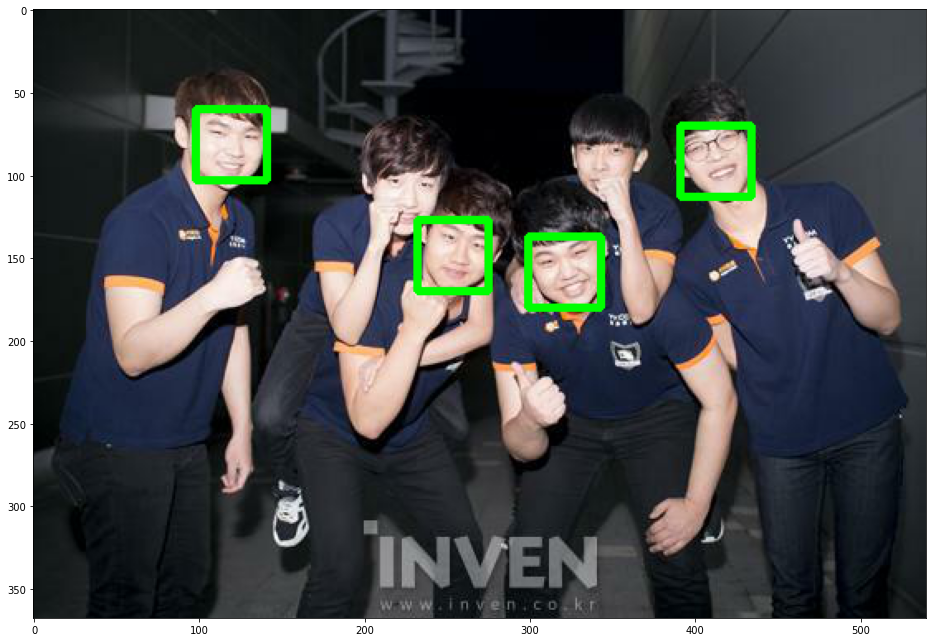

In [ ]:
# 이미지 출력
plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [45]:
plt.rcParams["figure.figsize"] = (1, 1)

# 이미지 파일들 로드 후 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/face_recognition/person1.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/face_recognition/person2.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/face_recognition/person3.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/face_recognition/person4.jpg"))

# 얼굴 인식 후 감지된 부분을 잘라내어 리스트 저장
known_face_list = []
for person in known_person_list:

  # 얼굴 좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  # 잘라낸 얼굴 저장
  known_face_list.append(face_image)

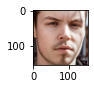

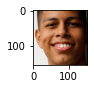

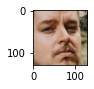

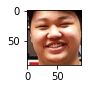

In [46]:
# 저장된 얼굴 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

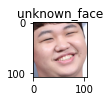

In [47]:
# 비교할 사진을 열고 얼굴 잘라내기
unknown_person = fr.load_image_file("/gdrive/My Drive/Colab/face_recognition/unknown.jfif")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# 타이틀을 붙여 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

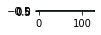

In [48]:
# 비교할 사진 인코딩 후 출력
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

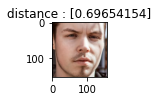

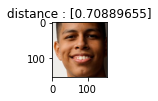

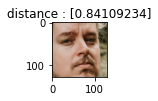

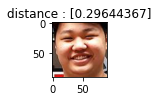

In [49]:
# 등록된 얼굴과 비교
for face in known_face_list:

  # 등록된 얼굴들 인코딩
  enc_known_face = fr.face_encodings(face)

  # 등록된 얼굴과 비교할 얼굴 간의 distance 구하기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  # distance 수치를 포함한 얼굴 출력
  plt.title("distance : " + str(distance))
  plt.imshow(face)
  plt.show()